In [1]:
import seaborn as sns
sns.set_theme(style="darkgrid")

In [2]:
# inspired by https://stackoverflow.com/questions/18603270/progress-indicator-during-pandas-operations
# nicely prints progress of lengthy pandas calculation in jupyter notebook
from tqdm.auto import tqdm 
tqdm.pandas()

In [3]:
from settings import SimulationSetup
from helper import create_df, get_hpc, let_keV_um
from printing import pretty_print

In [4]:
simulation_setup = SimulationSetup()
simulation_setup.start_E_MeV_u = 1.5
simulation_setup.stop_E_MeV_u = 60.
simulation_setup.num_E_MeV_u = 400

In [5]:
simulation_setup

SimulationSetup(beam=BeamSetup(particle_name='1H', start_E_MeV_u=1.5, stop_E_MeV_u=60.0, num_E_MeV_u=400, dose_gy=0.3), material=DetectorPropertySetup(material_name='Aluminum Oxide', slab_thickness_um=100.0), gamma_response_model=GammaResponseModel(name='GR_GeneralTarget', r=44.0, smax=27.6, d01=2.9, c1=1.0, m1=1.0, d02=4.66, c2=2.0, m2=1.0), tst_model=TrackStructureModel(er_model_name='ER_Edmund', rdd_model_name='RDD_Geiss', a0_nm=(95.0, 50.0, 150.0)), stopping_power_source_name='PSTAR', saturation_cross_section_factor=1.4)

In [6]:
pretty_print(simulation_setup)

SimulationSetup(
    beam=BeamSetup(
        particle_name='1H',
        start_E_MeV_u=1.5,
        stop_E_MeV_u=60.0,
        num_E_MeV_u=400,
        dose_gy=0.3,
    ),
    material=DetectorPropertySetup(
        material_name='Aluminum Oxide',
        slab_thickness_um=100.0,
    ),
    gamma_response_model=GammaResponseModel(
        name='GR_GeneralTarget',
        r=44.0,
        smax=27.6,
        d01=2.9,
        c1=1.0,
        m1=1.0,
        d02=4.66,
        c2=2.0,
        m2=1.0,
    ),
    tst_model=TrackStructureModel(
        er_model_name='ER_Edmund',
        rdd_model_name='RDD_Geiss',
        a0_nm=(
            95.0,
            50.0,
            150.0,
        ),
    ),
    stopping_power_source_name='PSTAR',
    saturation_cross_section_factor=1.4,
)


In [7]:
df = create_df(simulation_setup)

In [8]:
df

,E_MeV_u,a0_nm
0,1.500000,95.0
1,1.500000,50.0
2,1.500000,150.0
3,1.646617,95.0
4,1.646617,50.0
...,...,...
1195,59.853383,50.0
1196,59.853383,150.0
1197,60.000000,95.0
1198,60.000000,50.0


In [9]:
df['HPC'] = df.progress_apply(lambda df_tmp : get_hpc(df_tmp.E_MeV_u, df_tmp.a0_nm, simulation_setup), axis=1)
df.head()

  0%|          | 0/1200 [00:00<?, ?it/s]

,E_MeV_u,a0_nm,HPC
0,1.500000,95.0,0.0
1,1.500000,50.0,0.0
2,1.500000,150.0,0.0
3,1.646617,95.0,0.0
4,1.646617,50.0,0.0


In [10]:
df['let_keV_um'] = df.progress_apply(lambda df_tmp : let_keV_um(df_tmp.E_MeV_u, simulation_setup), axis=1)
df.head()

  0%|          | 0/1200 [00:00<?, ?it/s]

,E_MeV_u,a0_nm,HPC,let_keV_um
0,1.500000,95.0,0.0,55.683588
1,1.500000,50.0,0.0,55.683588
2,1.500000,150.0,0.0,55.683588
3,1.646617,95.0,0.0,52.302382
4,1.646617,50.0,0.0,52.302382


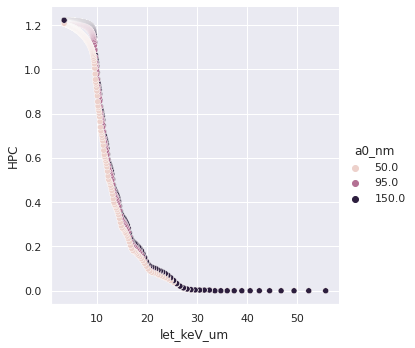

In [11]:
sns.relplot(x='let_keV_um', y='HPC', hue='a0_nm', data=df)